You will need to observe:

- A binary system with separation between 15" and 60" consisting of two medium-bright stars (m_v < 10)
- A bright (m_v < 6) A-star
- A bright (m_v < 6) M-star
- A spectrophotometric standard star with m_v < 12
- A bright nebula
- A dense star cluster
 

Your plan needs to include:

- Magnitude estimates in the blue, visual, and red filters
- Optical finder charts with a field of view of 15'

Remember this can be quite tricky for our selection of bright sources; if the DSS doesn't have a good image, we will need to search for alternatives; https://nova.astrometry.net/user_images/location (Links to an external site.) may be a good option
- Contingency plans for observations in September, October, or November.  (Plan for September, but say what changes if you observe in late November instead).  Plan to observe from sunset to ~3.5 hours after sunset.
- A planned list of exposures and when you will take them.  What CCD images do you need?
 

 

Spectrophotometric standard star lists

https://www.eso.org/sci/observing/tools/standards/spectra.html (Links to an external site.) 

https://www.eso.org/sci/observing/tools/standards/spectra/wdstandards.html (Links to an external site.)

https://mingus.mmto.arizona.edu/~bjw/mmt/spectro_standards.html (Links to an external site.)

https://www.naoj.org/Observing/Instruments/FOCAS/Detail/UsersGuide/Observing/StandardStar/Spec/SpecStandard.html (Links to an external site.)

https://noirlab.edu/science/observing-noirlab/observing-ctio/Spectrophotometric-Standards (Links to an external site.) 
 

Binary star lists:

https://www.astroleague.org/files/u220/DS-MasterObjectList2021.pdf (Links to an external site.) 

http://www.ianridpath.com/binaries.html (Links to an external site.) (no separations listed)

In [30]:
# libraries
from astropy import coordinates, units
from astropy import units as u # shortcut

from astroquery.simbad import Simbad

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_airmass 
from astroplan.plots import plot_finder_image
from astroplan.plots import plot_sky
from astropy.time import Time
from astroquery.vizier import Vizier

import matplotlib.pyplot as plt 

In [2]:
from astropy.utils import iers
iers.conf.IERS_A_URL = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
iers.conf.IERS_A_URL_MIRROR = 'https://datacenter.iers.org/data/9/finals2000A.all'
from astroplan import download_IERS_A
download_IERS_A()

## Setting up time

In [3]:
#Campus teaching observatory
CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='US/Eastern',
               name='University of Florida Campus Teaching Observatory',
              )
CTO

<Observer: name='University of Florida Campus Teaching Observatory',
    location (lon, lat, el)=(-82.34900399999998 deg, 29.643018 deg, 30.99999999950558 m),
    timezone=<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>>

In [4]:
now = Time.now()
now

<Time object: scale='utc' format='datetime' value=2022-09-09 16:19:01.373627>

In [5]:
CTO.sun_set_time(now).iso, CTO.sun_rise_time(now).iso

('2022-09-09 23:38:02.606', '2022-09-09 11:14:49.884')

In [7]:
now.to_datetime(timezone=CTO.timezone).isoformat()

'2022-09-09T12:19:01.373627-04:00'

In [8]:
def eastern(time):
    est = time.to_datetime(timezone=CTO.timezone)
    
    return est.strftime('%H:%M:%S')

In [9]:
(eastern(CTO.sun_set_time(now)), eastern(CTO.sun_rise_time(now)))

('19:38:02', '07:14:49')

# Visual Binary

## checking rise and set time

In [23]:
# this uses SESAME
EtaCrB_coord = coordinates.SkyCoord.from_name('Eta CrB')
EtaCrB_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (230.80127231, 30.28782502)>

In [24]:
EtaCrB_coord.to_string('hmsdms')

'15h23m12.3053544s +30d17m16.1700864s'

In [29]:
# Is Eta CrB up?
EtaCrB_target = FixedTarget(EtaCrB_coord, name="Eta CrB")
CTO.target_is_up(now, EtaCrB_target)

True

In [27]:
# Rise and set time for Eta CrB
(eastern(CTO.target_rise_time(time=now, target=EtaCrB_target)),
 eastern(CTO.target_set_time(time=now, target=EtaCrB_target)))

('10:21:38', '00:58:01')

Eta CrB has a magnitude of 5.02 and a current separation of 0".38 

https://www.webbdeepsky.com/double-stars/object/eta+CrB says, "From the current (2009) separation of 0".56 the stars widen to 0".67 in 2014 before closing to 0".38 in 2020 and then widening to 1".0 in 2032."

## Magnitude estimates in the blue, visual, and red filters

In [35]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(R)', 'flux(V)', 'flux(B)')
EtaCrB_simbad = Simbad.query_object('Eta CrB')
EtaCrB_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_R,FLUX_V,FLUX_B,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,int32
* eta CrB,15 23 12.3053,+30 17 16.170,9,9,4.310,3.510,89,A,O,2007A&A...474..653V,4.5,4.98,5.56,1


## Optical finder charts with a field of view of 15'

<PolarAxesSubplot:>

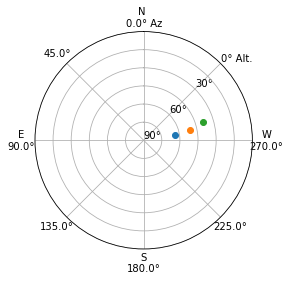

In [36]:
## Finder chart ##

# where the objects are at sunset
sunset = CTO.sun_set_time(now)

# hour after sunset
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

targets = [EtaCrB_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

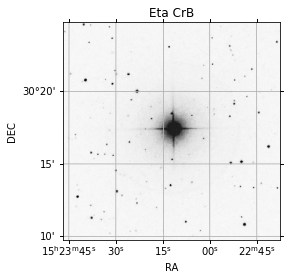

In [37]:
## sky chart Eta CrB ##
ax, hdu = plot_finder_image(EtaCrB_target, survey='DSS', fov_radius=15*u.arcmin)

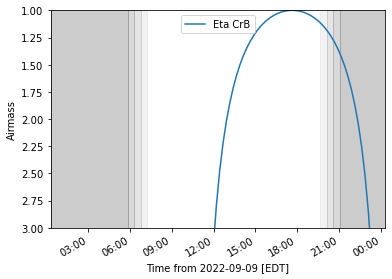

In [44]:
# airmass/altitude plot
plot_airmass([EtaCrB_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

## Contingency

Sabik, will be visible throughout semester

# A bright (m_v < 6) A-star

In [45]:
ald_coord = coordinates.SkyCoord.from_name('Alderamin')
ald_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (319.6448847, 62.58557446)>

In [46]:
ald_coord.to_string('hmsdms')

'21h18m34.77232728s +62d35m08.0680704s'

In [51]:
ald_target = FixedTarget(ald_coord, name="Alderamin")
CTO.target_is_up(now, ald_target)

True

In [52]:
(eastern(CTO.target_rise_time(time=now, target=ald_target)),
 eastern(CTO.target_set_time(time=now,  target=ald_target)))

ValueError: year -4713 is out of range

The above code results in errors, meaning it does not set nor rise. 

## Magnitude estimates in the blue, visual, and red filters

In [54]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(R)', 'flux(V)', 'flux(B)')
ald_simbad = Simbad.query_object('Alderamin')
ald_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_R,FLUX_V,FLUX_B,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,int32
* alf Cep,21 18 34.7723,+62 35 08.068,9,9,0.790,0.790,90,A,O,2007A&A...474..653V,2.22,2.46,2.68,1


## Plots

<PolarAxesSubplot:>

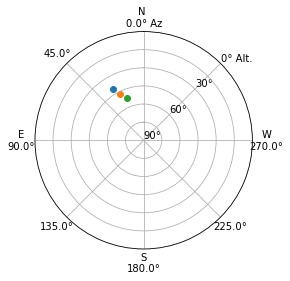

In [55]:
targets = [ald_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

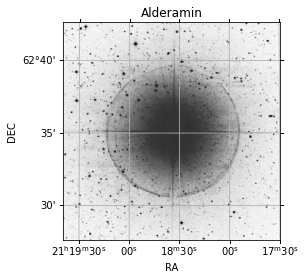

In [134]:
## sky chart Alderamin ##
ax, hdu = plot_finder_image(ald_target, survey='DSS', fov_radius=15*u.arcmin)

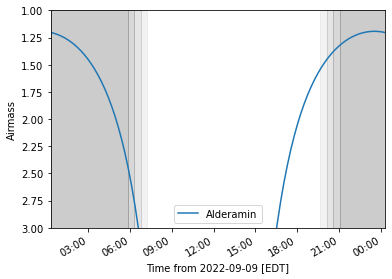

In [57]:
# airmass/altitude plot
plot_airmass([ald_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

## Contingency

None needed, this star is visible throughout the semester

# A bright (m_v < 6) M-star

In [127]:
bar_coord = coordinates.SkyCoord.from_name("Barnard's Star")
bar_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (269.45207696, 4.69336497)>

In [128]:
bar_coord.to_string('hmsdms')

'17h57m48.49847007s +04d41m36.11387968s'

In [129]:
bar_target = FixedTarget(bar_coord, name="Barnard's Star")
CTO.target_is_up(now, bar_target)

False

In [130]:
# Rise and set time for Proxima Centauri
(eastern(CTO.target_rise_time(time=now, target=bar_target)),
 eastern(CTO.target_set_time(time=now,  target=bar_target)))

('14:02:32', '02:25:52')

Magnitude M5.5 Ve

## Magnitude estimates in the blue, visual, and red filters

In [131]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(R)', 'flux(V)', 'flux(B)')
bar_simbad = Simbad.query_object("Barnard's Star")
bar_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_R,FLUX_V,FLUX_B,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,int32
NAME Barnard's star,17 57 48.4984,+04 41 36.113,14,14,0.026,0.029,90,A,O,2020yCat.1350....0G,8.298,9.511,11.24,1


## Plots

<PolarAxesSubplot:>

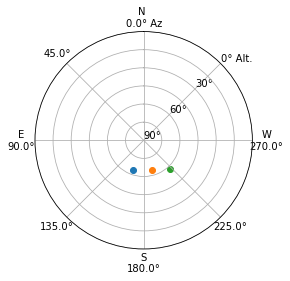

In [132]:
targets = [bar_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

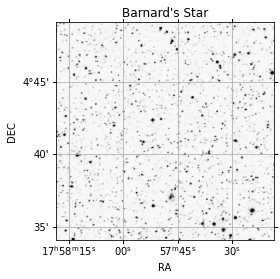

In [135]:
## sky chart Barnard's Star ##
ax, hdu = plot_finder_image(bar_target, survey='DSS', fov_radius=15*u.arcmin)

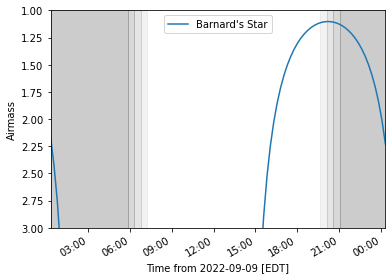

In [136]:
# airmass/altitude plot
plot_airmass([bar_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

https://nova.astrometry.net/user_images/location?thumbnail_size=&sort=&calibrated=on&ra=269.45207696&dec=4.69336497&radius=0.25
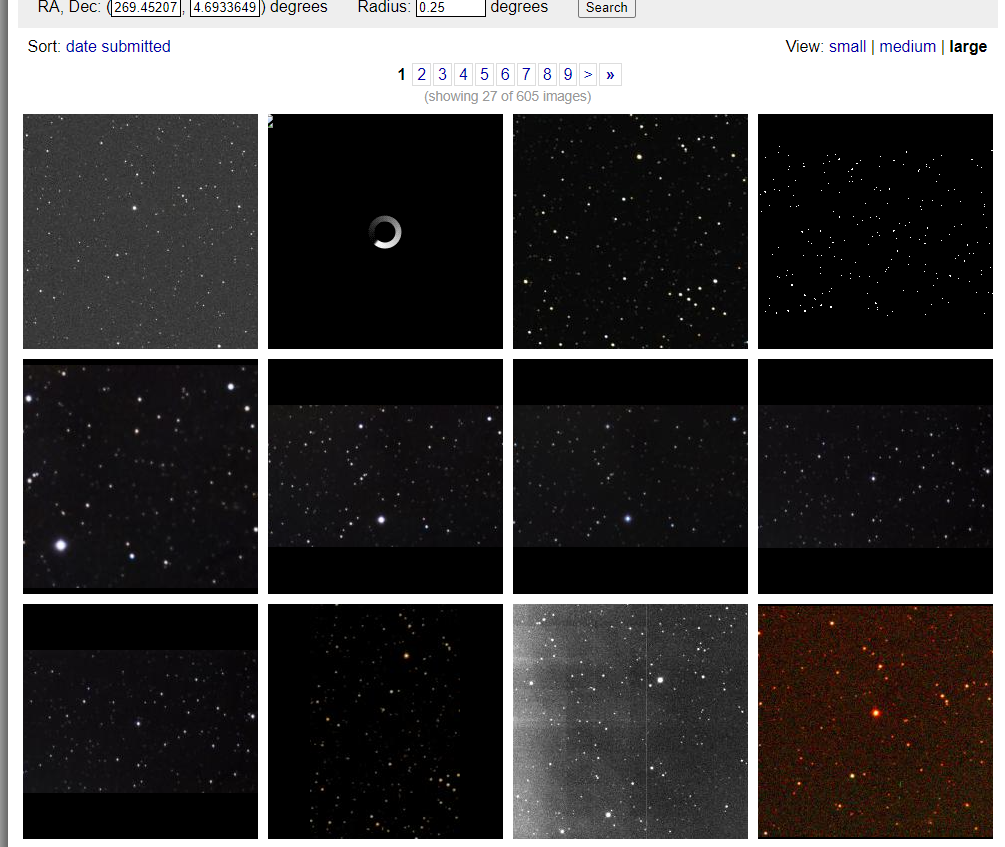

# A spectrophotometric standard star with m_v < 12

In [179]:
vega_coord = coordinates.SkyCoord.from_name("Alpha Lyr") #HZ 44
vega_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (279.23473479, 38.78368896)>

In [180]:
vega_coord.to_string('hmsdms')

'18h36m56.33634888s +38d47m01.2802416s'

In [181]:
vega_target = FixedTarget(vega_coord, name="Alpha Lyr")
CTO.target_is_up(now, vega_target)

False

In [182]:
# Rise and set time for Proxima Centauri
(eastern(CTO.target_rise_time(time=now, target=vega_target)),
 eastern(CTO.target_set_time(time=now,  target=vega_target)))

('13:03:13', '04:42:31')

## Magnitude estimates in the blue, visual, and red filters

In [183]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(R)', 'flux(V)', 'flux(B)')
vega_simbad = Simbad.query_object("Barnard's Star")
vega_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_R,FLUX_V,FLUX_B,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,int32
NAME Barnard's star,17 57 48.4984,+04 41 36.113,14,14,0.026,0.029,90,A,O,2020yCat.1350....0G,8.298,9.511,11.24,1


## Plots

<PolarAxesSubplot:>

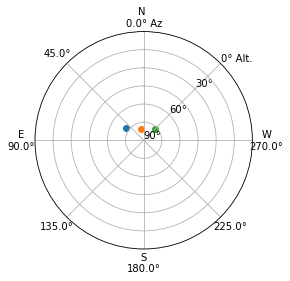

In [184]:
targets = [vega_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

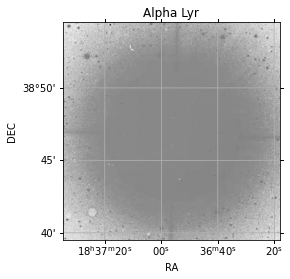

In [185]:
## sky chart Vega ##
ax, hdu = plot_finder_image(vega_target, survey='DSS', fov_radius=15*u.arcmin)

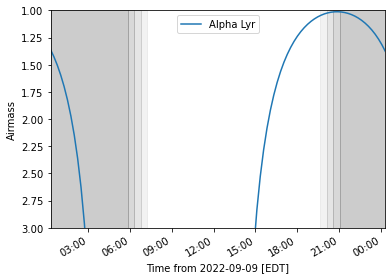

In [186]:
# airmass/altitude plot
plot_airmass([vega_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

https://nova.astrometry.net/user_images/location?thumbnail_size=&sort=&calibrated=on&ra=279.23473479&dec=38.78368896&radius=0.25
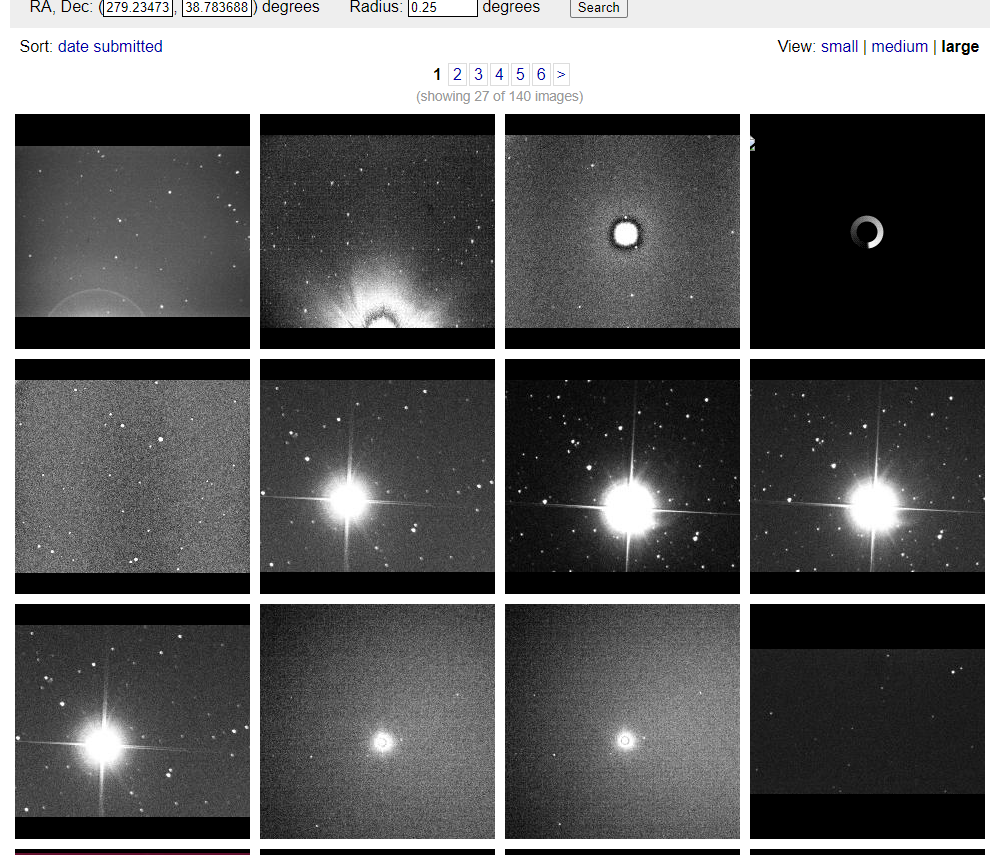

# A bright nebula


In [192]:
naneb_coord = coordinates.SkyCoord.from_name("North America Nebula") 
naneb_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (314.6958, 44.33)>

In [193]:
naneb_coord.to_string('hmsdms')

'20h58m46.992s +44d19m48s'

In [194]:
naneb_target = FixedTarget(naneb_coord, name="North America Nebula")
CTO.target_is_up(now, naneb_target)

False

In [195]:
# Rise and set time for Proxima Centauri
(eastern(CTO.target_rise_time(time=now, target=naneb_target)),
 eastern(CTO.target_set_time(time=now,  target=naneb_target)))

('14:58:10', '07:30:36')

## Magnitude estimates in the blue, visual, and red filters

In [196]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(R)', 'flux(V)', 'flux(B)')
naneb_simbad = Simbad.query_object("North America Nebula")
naneb_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_R,FLUX_V,FLUX_B,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,int32
NGC 7000,20 58 47,+44 19.8,4,4,--,--,0,E,,,--,--,--,1


Visual magnitude of 4 - from google search

## Plots

<PolarAxesSubplot:>

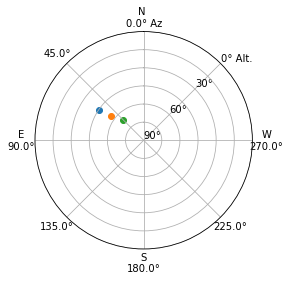

In [200]:
targets = [naneb_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

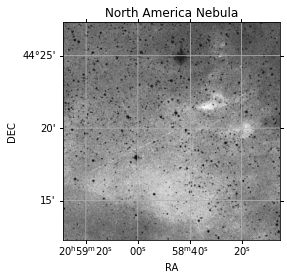

In [201]:
## sky chart North America Nebula ##
ax, hdu = plot_finder_image(naneb_target, survey='DSS', fov_radius=15*u.arcmin)

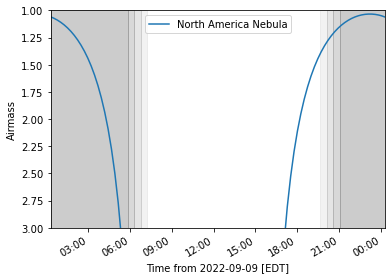

In [202]:
# airmass/altitude plot
plot_airmass([naneb_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

https://nova.astrometry.net/user_images/location?thumbnail_size=&sort=&calibrated=on&ra=314.6958&dec=44.33&radius=0.25
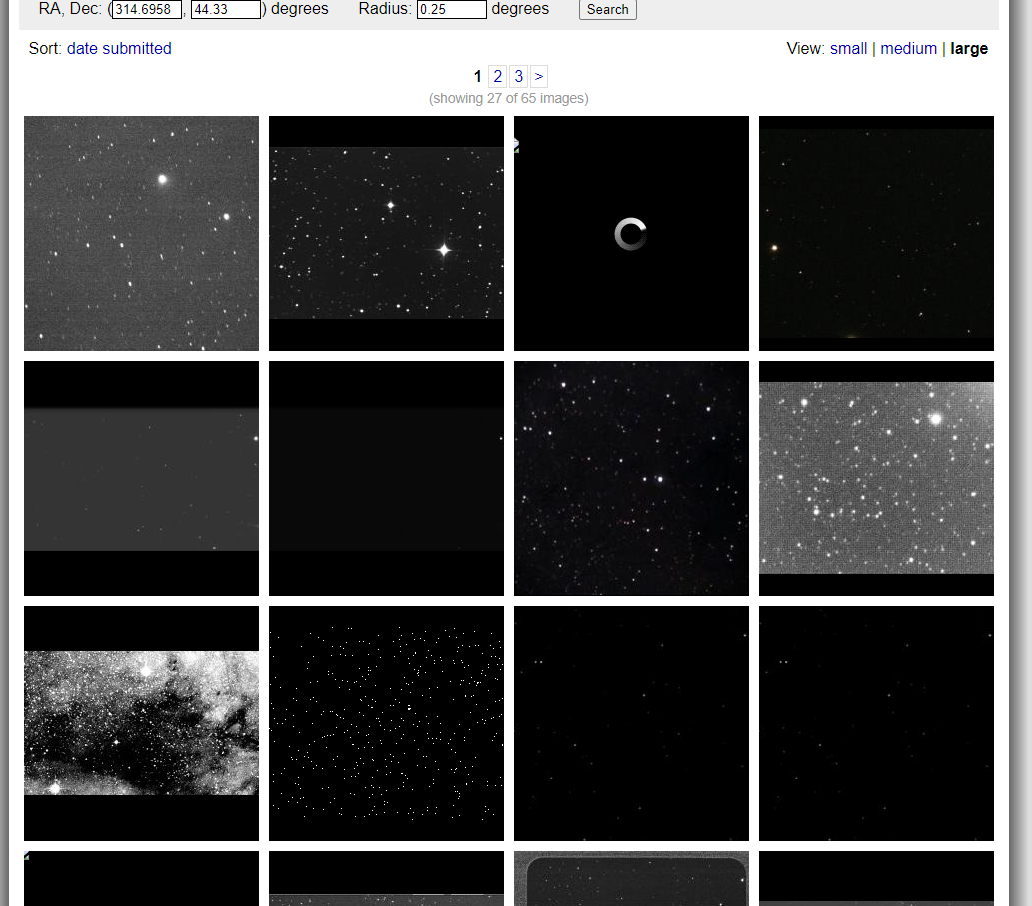

## Contingency

None neeved, visible throughout semester

# A dense star cluster

In [248]:
arch_coord = coordinates.SkyCoord.from_name("Arches Cluster")
arch_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (266.46042, -28.82444)>

In [249]:
arch_coord.to_string('hmsdms')

'17h45m50.5008s -28d49m27.984s'

In [250]:
arch_target = FixedTarget(arch_coord, name="Arches Cluster")
CTO.target_is_up(now, arch_target)

False

In [251]:
# Rise and set time for Proxima Centauri
(eastern(CTO.target_rise_time(time=now, target=arch_target)),
 eastern(CTO.target_set_time(time=now,  target=arch_target)))

('15:14:26', '00:50:43')

## Magnitude estimates in the blue, visual, and red filters

In [252]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(R)', 'flux(V)', 'flux(B)')
arch_simbad = Simbad.query_object("Arches Cluster")
arch_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_R,FLUX_V,FLUX_B,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,int32
NAME Arches Cluster,17 45 50.5,-28 49 28,5,5,--,--,0,D,,2002ApJ...566..880G,--,--,--,1


## Plots

<PolarAxesSubplot:>

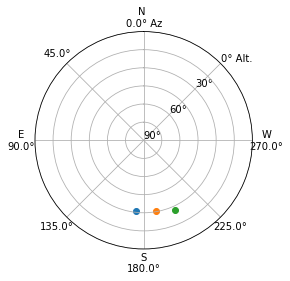

In [253]:
targets = [arch_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

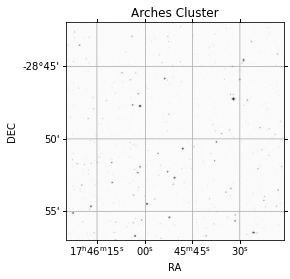

In [254]:
## sky chart Barnard's Star ##
ax, hdu = plot_finder_image(arch_target, survey='DSS', fov_radius=15*u.arcmin)

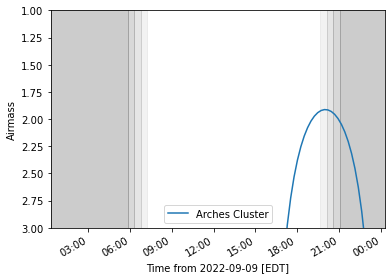

In [255]:
# airmass/altitude plot
plot_airmass([arch_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

https://nova.astrometry.net/user_images/location?thumbnail_size=&sort=&calibrated=on&ra=266.46042&dec=-28.82444&radius=0.25
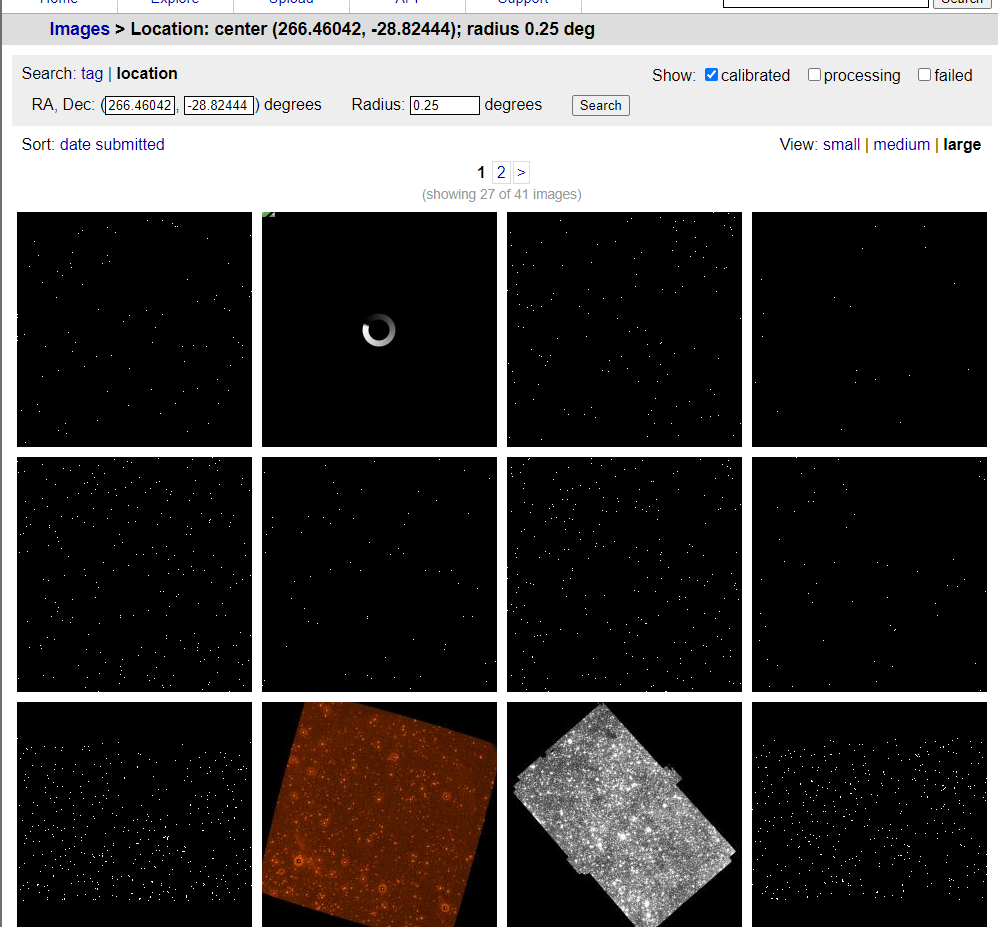

## Contingency

None neeved, visible throughout semester

<PolarAxesSubplot:>

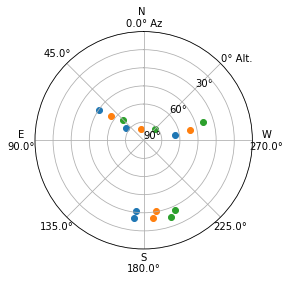

In [256]:
targets = [arch_target,naneb_target,vega_target,bar_target,EtaCrB_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

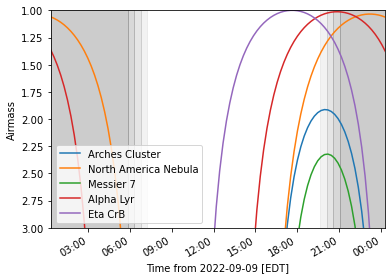

In [257]:
# airmass/altitude plot
plot_airmass(targets,
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

# Exposure plan

1. 6 pm to 7 pm Set up at CTO before twilight
2. 7 pm to 8 pm Begin taking flat/dark/bright/twilight images as the sun is setting 
3. 8 pm to 8:30 pm After twilights, align telescope on three known objects
4. 8:40 pm Messier 7
 - ten exposures each at 1s and 10 s long. Longer exposure times if needed 
5. 9:10 pm Arches Cluster
 - ten exposures each at 1s and 10 s long. Longer exposure times if needed
6. 10 pm Eta CrB
 - ten exposures each at 1s and 10 s long. Longer exposure times if needed
7. 10:30 pm Alpha Lyr
 - ten 0.4 s exposures
8. 11 pm North America Nebula
 - ten exposures each at 10 s, 30 s,and 1 min long exposure
9. 11:30 pm Break down equipment 